In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
#trace = dd.read_csv('Dataset/merged_job.csv', assume_missing = True)

trace = pd.read_csv('Dataset/merged_job.csv')

In [3]:
trace = trace.drop(columns=['Unnamed: 0'])

In [4]:
trace.describe(include = "all")

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,memory_accesses_per_instruction,cpu_usage_distribution.0,cpu_usage_distribution.1,cpu_usage_distribution.2,cpu_usage_distribution.3,cpu_usage_distribution.4,cpu_usage_distribution.5
count,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.568117e+07,1.261982e+07,1.317889e+07,1.317889e+07,1.317889e+07,1.317889e+07,1.317889e+07,1.317889e+07
mean,2.008650e+08,6.899468e-02,4.775009e+11,5.197057e+00,8.992651e-03,2.915825e-03,1.335105e-02,1.708059e+00,3.473105e-01,3.841495e-03,1.140184e-02,2.182100e-03,3.586146e-03,4.259627e-03,4.801901e-03,5.297371e-03,5.791362e-03
std,1.281606e+08,2.534451e-01,2.149035e+11,2.717811e+01,1.235623e-02,4.615541e-03,1.147728e-01,5.859405e-01,4.761155e-01,5.941522e-03,9.477676e-03,1.213159e-02,1.682316e-02,1.848332e-02,1.973365e-02,2.082409e-02,2.185447e-02
min,1.000000e+06,0.000000e+00,2.762056e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.900000e+07,0.000000e+00,2.868939e+11,0.000000e+00,1.689911e-03,6.990433e-04,0.000000e+00,1.000000e+00,0.000000e+00,1.615524e-03,3.205428e-03,7.343292e-05,9.822845e-05,1.115799e-04,1.239777e-04,1.401901e-04,1.573563e-04
50%,3.000000e+08,0.000000e+00,3.469111e+11,1.000000e+00,2.025604e-03,1.846313e-03,0.000000e+00,2.000000e+00,0.000000e+00,2.498627e-03,1.145014e-02,1.487732e-04,2.002716e-04,2.346039e-04,2.651215e-04,2.994537e-04,3.414154e-04
75%,3.000000e+08,0.000000e+00,7.353663e+11,1.000000e+00,1.620483e-02,2.605438e-03,0.000000e+00,2.000000e+00,1.000000e+00,4.035950e-03,1.740268e-02,3.061295e-04,3.976822e-04,4.491806e-04,5.092621e-04,6.027222e-04,7.743835e-04
max,3.000000e+08,1.000000e+00,8.257982e+11,3.600000e+02,9.716797e-02,1.667480e-01,1.000000e+00,3.000000e+00,1.000000e+00,2.500000e-01,1.818961e-01,5.595703e-01,5.595703e-01,5.693359e-01,5.820312e-01,5.917969e-01,5.996094e-01


array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'collection_id'}>,
        <AxesSubplot:title={'center':'priority'}>],
       [<AxesSubplot:title={'center':'resource_request.cpus'}>,
        <AxesSubplot:title={'center':'resource_request.memory'}>,
        <AxesSubplot:title={'center':'collection_type'}>,
        <AxesSubplot:title={'center':'vertical_scaling'}>],
       [<AxesSubplot:title={'center':'scheduler'}>,
        <AxesSubplot:title={'center':'assigned_memory'}>,
        <AxesSubplot:title={'center':'memory_accesses_per_instruction'}>,
        <AxesSubplot:title={'center':'cpu_usage_distribution.0'}>],
       [<AxesSubplot:title={'center':'cpu_usage_distribution.1'}>,
        <AxesSubplot:title={'center':'cpu_usage_distribution.2'}>,
        <AxesSubplot:title={'center':'cpu_usage_distribution.3'}>,
        <AxesSubplot:title={'center':'cpu_usage_distribution.4'}>],
       [<AxesSubplot:tit

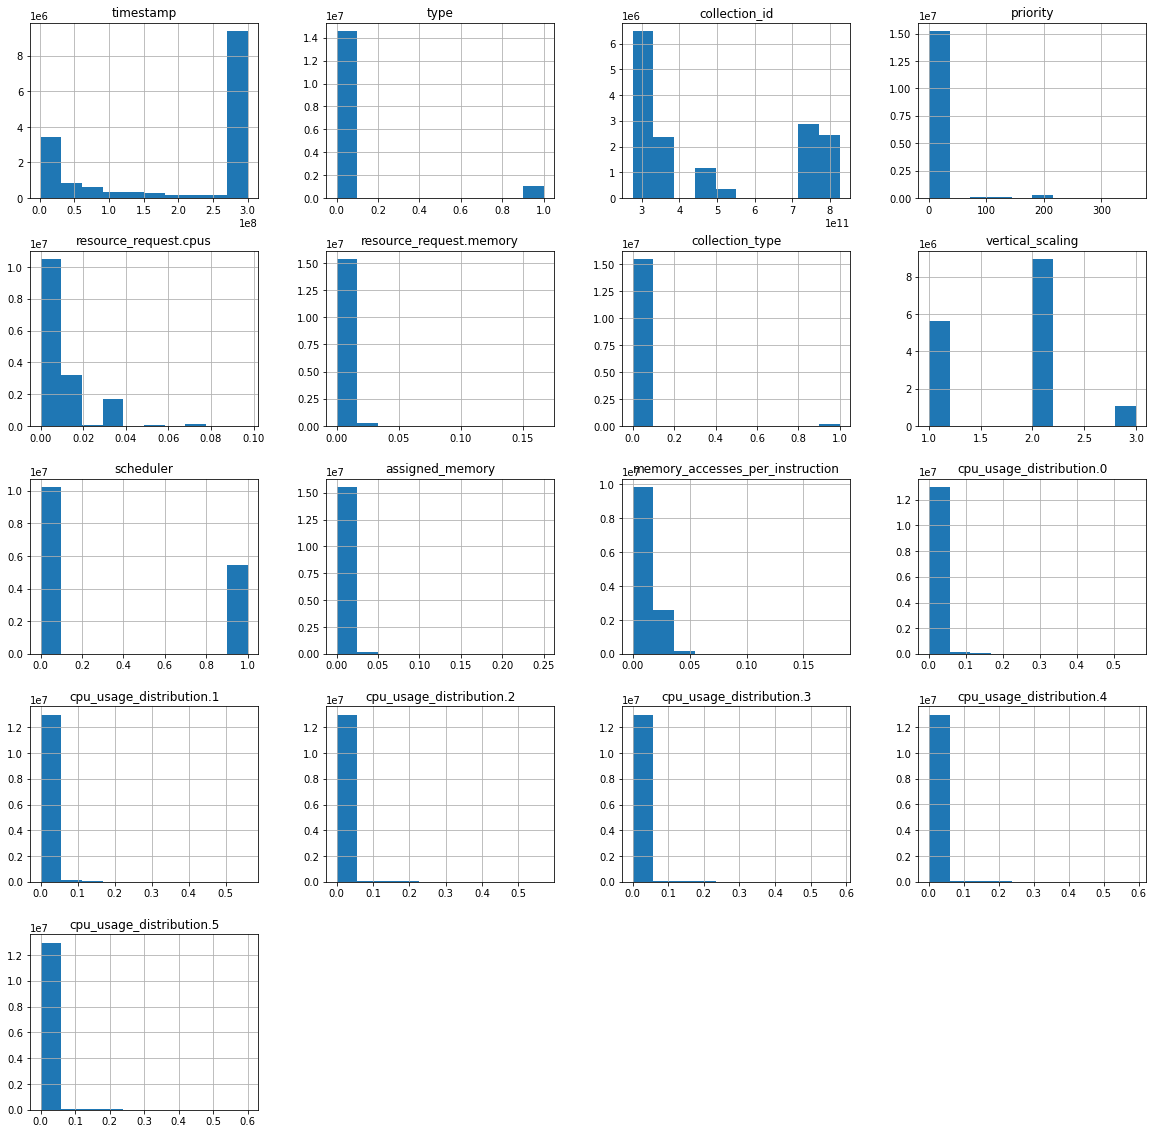

In [5]:
trace.hist(figsize = (20,20))

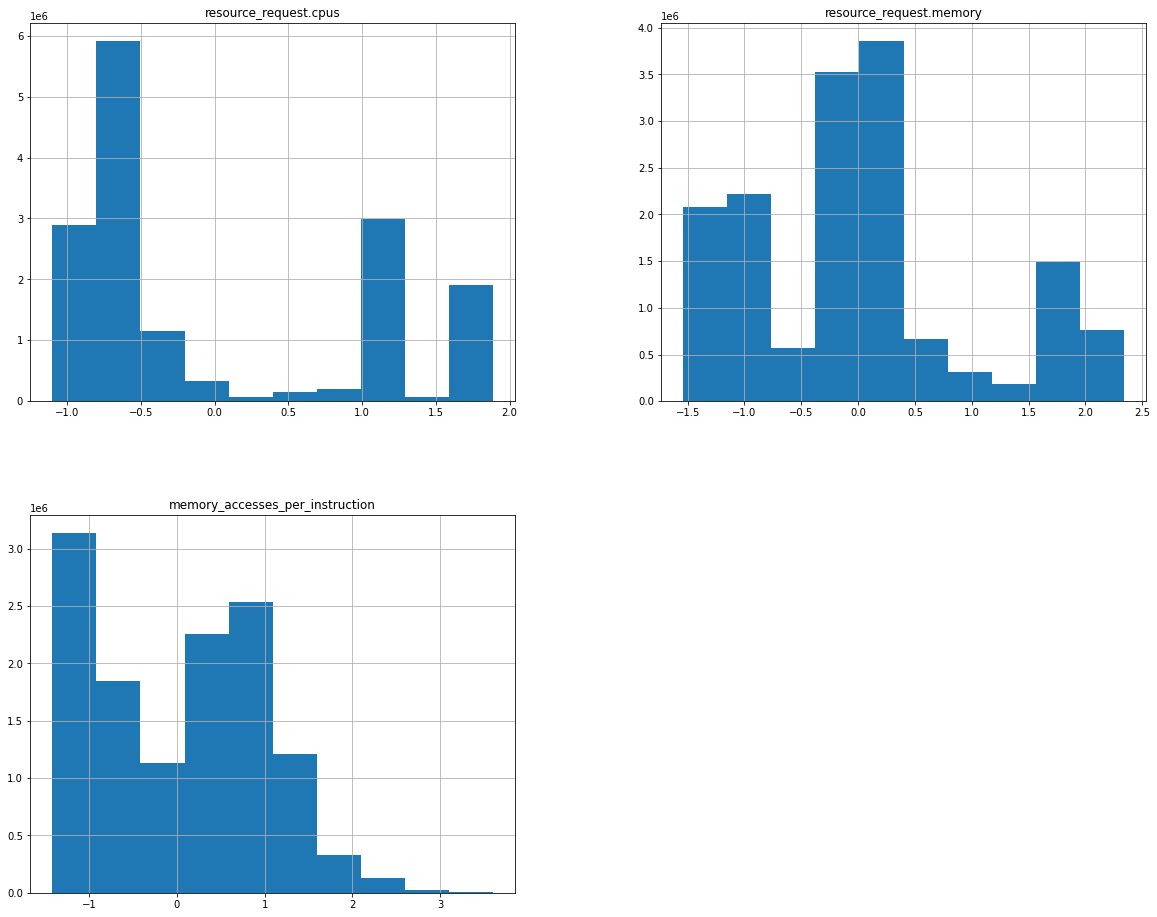

In [6]:
from sklearn.preprocessing import PowerTransformer
trace_log = trace
pt = PowerTransformer()

cols = [4, 5, 10]

trace_log.iloc[:, cols] = pd.DataFrame(pt.fit_transform(trace_log.iloc[:, cols]))
trace_log.iloc[:, cols] .hist(figsize=(20,16));

<AxesSubplot:>

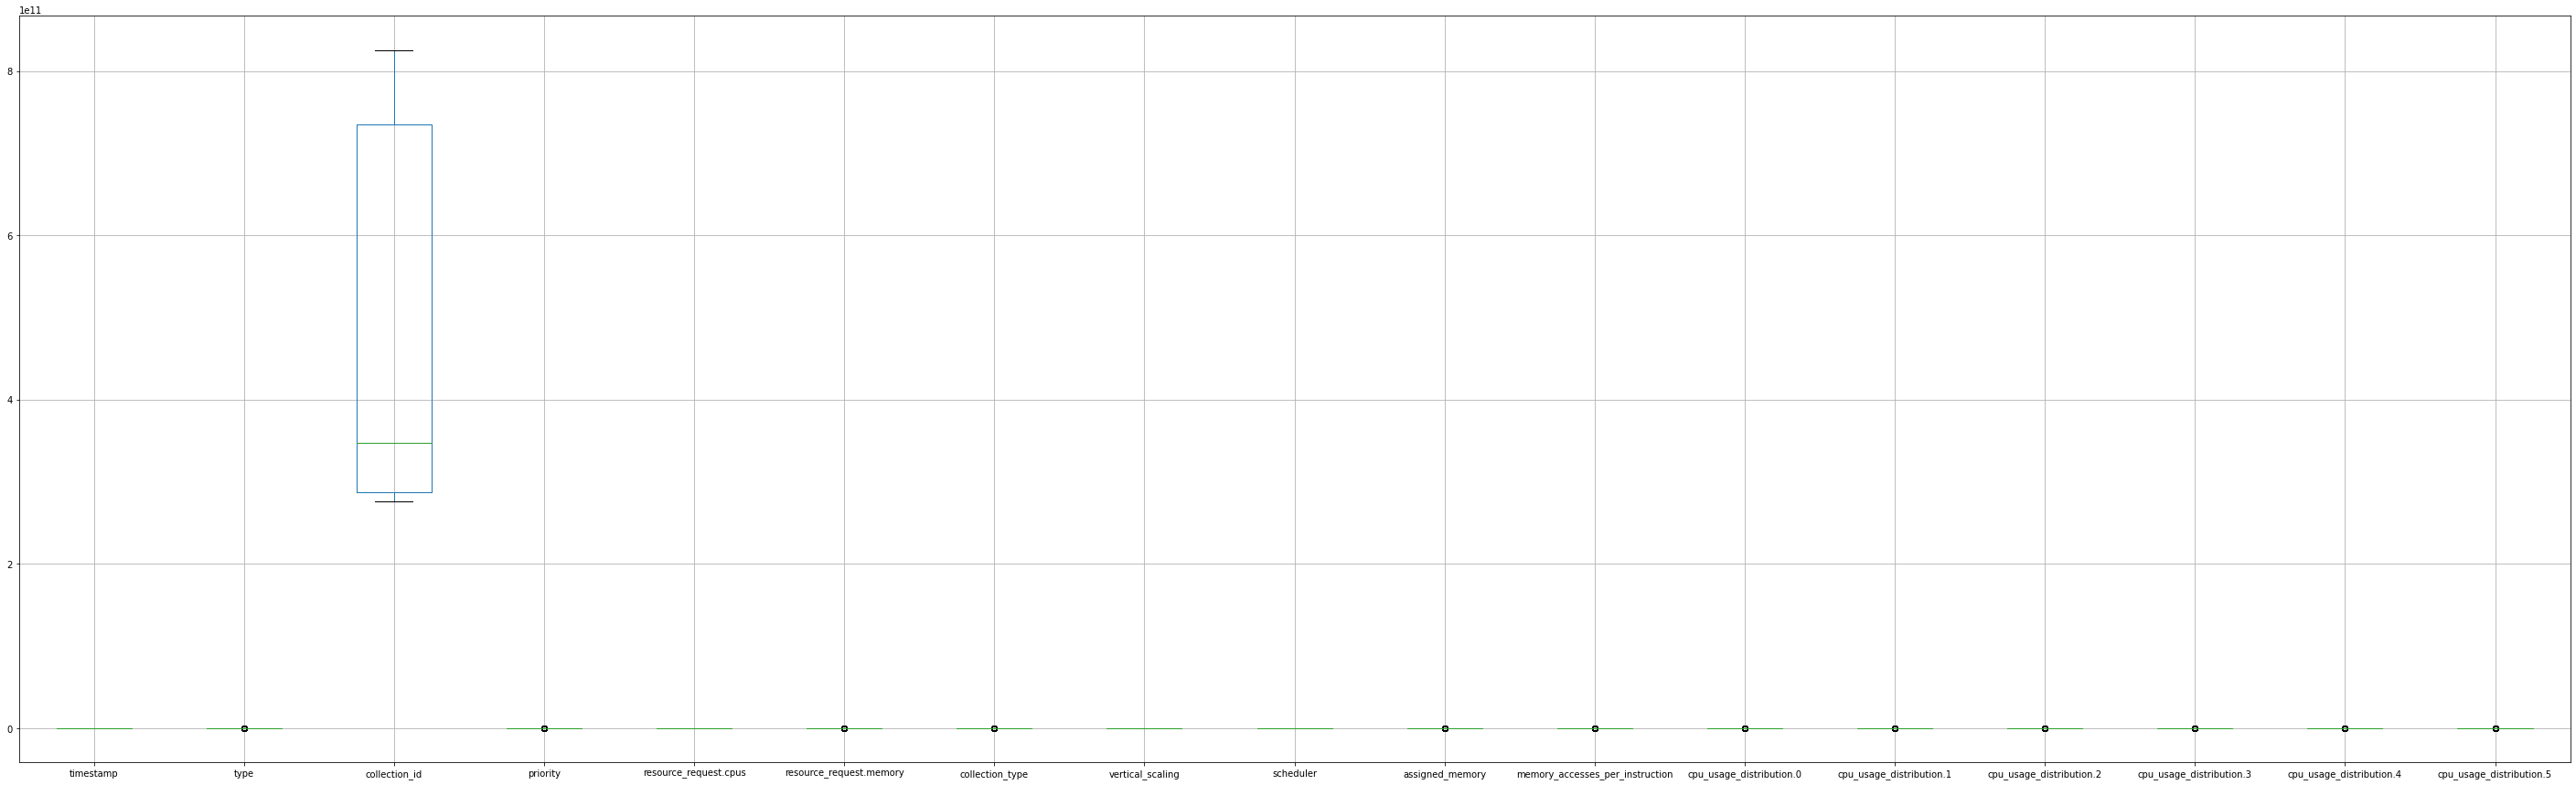

In [7]:
trace_log.boxplot(figsize=(50,15))

Text(0.5, 1.0, 'Feature Correlating with Job Failure')

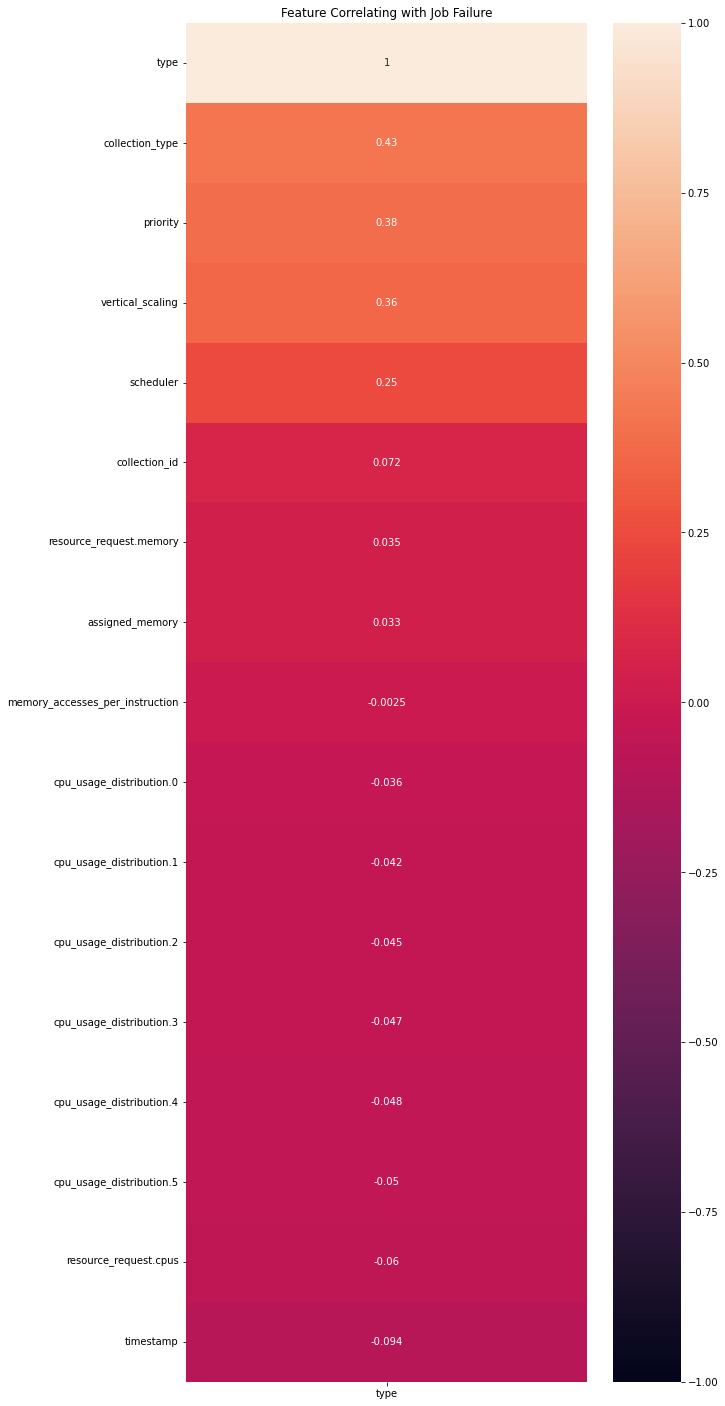

In [8]:
plt.figure(figsize=(9,25))
heatmap = sns.heatmap(trace.corr()[['type']].sort_values(by='type', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlating with Job Failure')

In [1]:
print('Trace Dataset Table')
print('Checking Null Values')
print('Number of Rows : ', len(trace))
print('Number of Null Row For All Column : ', trace.isna().sum().sum())
print('Number of Null Row For Each Column : ')
trace.sum()

Trace Dataset Table
Checking Null Values


NameError: name 'trace' is not defined

In [10]:
for col in trace:
    trace[col] = pd.to_numeric(trace[col], errors='coerce')

trace.dtypes

timestamp                          float64
type                               float64
collection_id                      float64
priority                           float64
resource_request.cpus              float64
resource_request.memory            float64
collection_type                    float64
vertical_scaling                   float64
scheduler                          float64
assigned_memory                    float64
memory_accesses_per_instruction    float64
cpu_usage_distribution.0           float64
cpu_usage_distribution.1           float64
cpu_usage_distribution.2           float64
cpu_usage_distribution.3           float64
cpu_usage_distribution.4           float64
cpu_usage_distribution.5           float64
dtype: object

In [11]:
trace = trace.loc[~((trace['memory_accesses_per_instruction'] == 0))]

In [12]:
trace['cpu_usage_distribution.0'] = trace['cpu_usage_distribution.0'].interpolate(method="backfill")
trace['cpu_usage_distribution.1'] = trace['cpu_usage_distribution.1'].interpolate(method="backfill")
trace['cpu_usage_distribution.2'] = trace['cpu_usage_distribution.2'].interpolate(method="backfill")
trace['cpu_usage_distribution.3'] = trace['cpu_usage_distribution.3'].interpolate(method="backfill")
trace['cpu_usage_distribution.4'] = trace['cpu_usage_distribution.4'].interpolate(method="backfill")
trace['cpu_usage_distribution.5'] = trace['cpu_usage_distribution.5'].interpolate(method="backfill")
trace['memory_accesses_per_instruction'] = trace['memory_accesses_per_instruction'].interpolate(method="backfill")

In [13]:
print('Trace Dataset Table')
print('Checking Null Values')
print('Number of Rows : ', len(trace))
print('Number of Null Row For All Column : ', trace.isna().sum().sum())
print('Number of Null Row For Each Column : ')
trace.isna().sum()

Trace Dataset Table
Checking Null Values
Number of Rows :  15681166
Number of Null Row For All Column :  900
Number of Null Row For Each Column : 


timestamp                            0
type                                 0
collection_id                        0
priority                             0
resource_request.cpus                0
resource_request.memory              0
collection_type                      0
vertical_scaling                     0
scheduler                            0
assigned_memory                      0
memory_accesses_per_instruction    900
cpu_usage_distribution.0             0
cpu_usage_distribution.1             0
cpu_usage_distribution.2             0
cpu_usage_distribution.3             0
cpu_usage_distribution.4             0
cpu_usage_distribution.5             0
dtype: int64

In [14]:
trace = trace.drop(columns=['memory_accesses_per_instruction'])

In [15]:
print('Trace Dataset Table')
print('Checking Null Values')
print('Number of Rows : ', len(trace))
print('Number of Null Row For All Column : ', trace.isna().sum().sum())
print('Number of Null Row For Each Column : ')
trace.isna().sum()

Trace Dataset Table
Checking Null Values
Number of Rows :  15681166
Number of Null Row For All Column :  0
Number of Null Row For Each Column : 


timestamp                   0
type                        0
collection_id               0
priority                    0
resource_request.cpus       0
resource_request.memory     0
collection_type             0
vertical_scaling            0
scheduler                   0
assigned_memory             0
cpu_usage_distribution.0    0
cpu_usage_distribution.1    0
cpu_usage_distribution.2    0
cpu_usage_distribution.3    0
cpu_usage_distribution.4    0
cpu_usage_distribution.5    0
dtype: int64

In [16]:
trace = trace.assign(cpu_usage =trace['cpu_usage_distribution.0'] + trace['cpu_usage_distribution.1'] + trace['cpu_usage_distribution.2'] + 
                     trace['cpu_usage_distribution.3'] + trace['cpu_usage_distribution.4'] + trace['cpu_usage_distribution.5'])
                     
                     
#trace['cpu_usage_distribution.0'] + trace['cpu_usage_distribution.1'] + trace['cpu_usage_distribution.2'] + trace['cpu_usage_distribution.3'] + trace['cpu_usage_distribution.4'] + trace['cpu_usage_distribution.5'])

In [17]:
power_minimum = float(87)
power_maximum = float(145)
time_double = float(2)
exponent = float(1.4)

trace_dataset = trace.assign(power_consumption = power_minimum + (power_maximum - power_minimum) * ((time_double) * (trace['cpu_usage']) - (trace['cpu_usage']**exponent)))

In [18]:
trace_dataset = trace_dataset.drop(columns=['cpu_usage_distribution.0', 'cpu_usage_distribution.1', 'cpu_usage_distribution.2', 'cpu_usage_distribution.3', 'cpu_usage_distribution.4', 'cpu_usage_distribution.5'])

#'cpu_usage_distribution.0', 'cpu_usage_distribution.1', 'cpu_usage_distribution.2', 'cpu_usage_distribution.3', 'cpu_usage_distribution.4', 'cpu_usage_distribution.5'

In [19]:
print('Trace Dataset Table')
print('Checking Null Values')
print('Number of Rows : ', len(trace_dataset))
print('Number of Null Row For All Column : ', trace_dataset.isna().sum().sum())
print('Number of Null Row For Each Column : ')
trace_dataset.isna().sum()

Trace Dataset Table
Checking Null Values
Number of Rows :  15681166
Number of Null Row For All Column :  0
Number of Null Row For Each Column : 


timestamp                  0
type                       0
collection_id              0
priority                   0
resource_request.cpus      0
resource_request.memory    0
collection_type            0
vertical_scaling           0
scheduler                  0
assigned_memory            0
cpu_usage                  0
power_consumption          0
dtype: int64

In [20]:
trace_dataset.tail(20)

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
15681146,230000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.000921,87.103602
15681147,230000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.000921,87.103602
15681148,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681149,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681150,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681151,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681152,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681153,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681154,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812
15681155,69000000.0,0.0,2.803412e+11,117.0,0.990108,0.616250,0.0,1.0,0.0,0.003254,0.001339,87.149812


Text(0.5, 1.0, 'Feature Correlating with Job Failure')

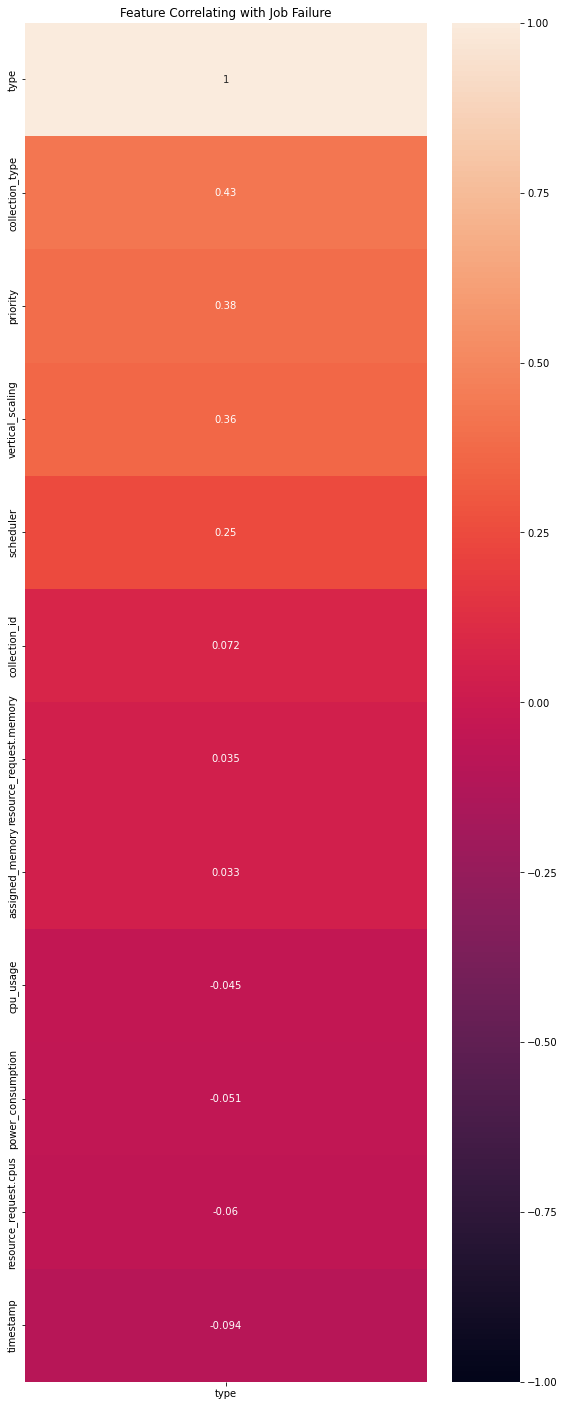

In [21]:
plt.figure(figsize=(9,25))
heatmap = sns.heatmap(trace_dataset.corr()[['type']].sort_values(by='type', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlating with Job Failure')

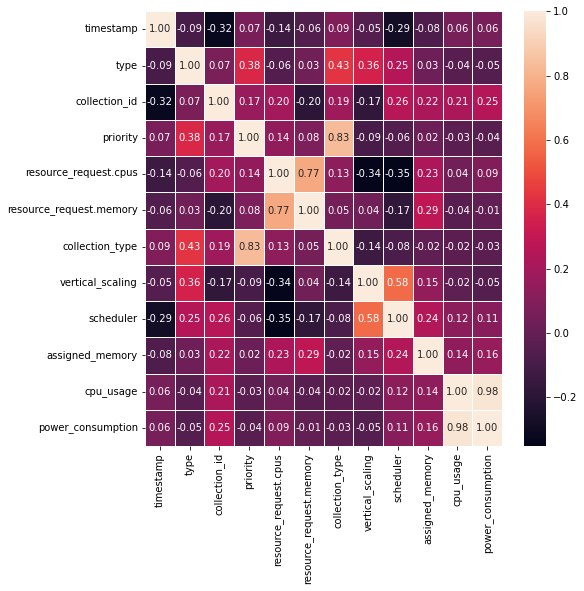

In [22]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(trace_dataset.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [24]:
trace_dataset.to_csv('Dataset/trace4_dataset.csv')